In [ ]:
#-- Install required packages
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.2 requires statsmodels>=0.14.0, but you have statsmodels 0.13.2 which is incompatible.


In [ ]:
#-- Load required packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [1]:
#-- Define basinc functions to simulate example data

# function (1)
#-- sim_x is the function to simulate n random numbers from 0 to 1
def sim_x(n):
    x = np.random.random((n,1)) # U[0,1]
    return x

# function (2)
#-- true mean function
def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

#-- function (3)
#-- generate Y|X from N{f(x), sd}; N: normal distribution
# sd here is the standard deviation of error in observational data
# the error is assumed to be a Gaussian noise
def sim_y(x, sd):
    n = len(x)
    error = np.random.normal(0,sd,n).reshape(n,1) # (n,) vector to (n,1) vector
    y = f(x) + error
    return y

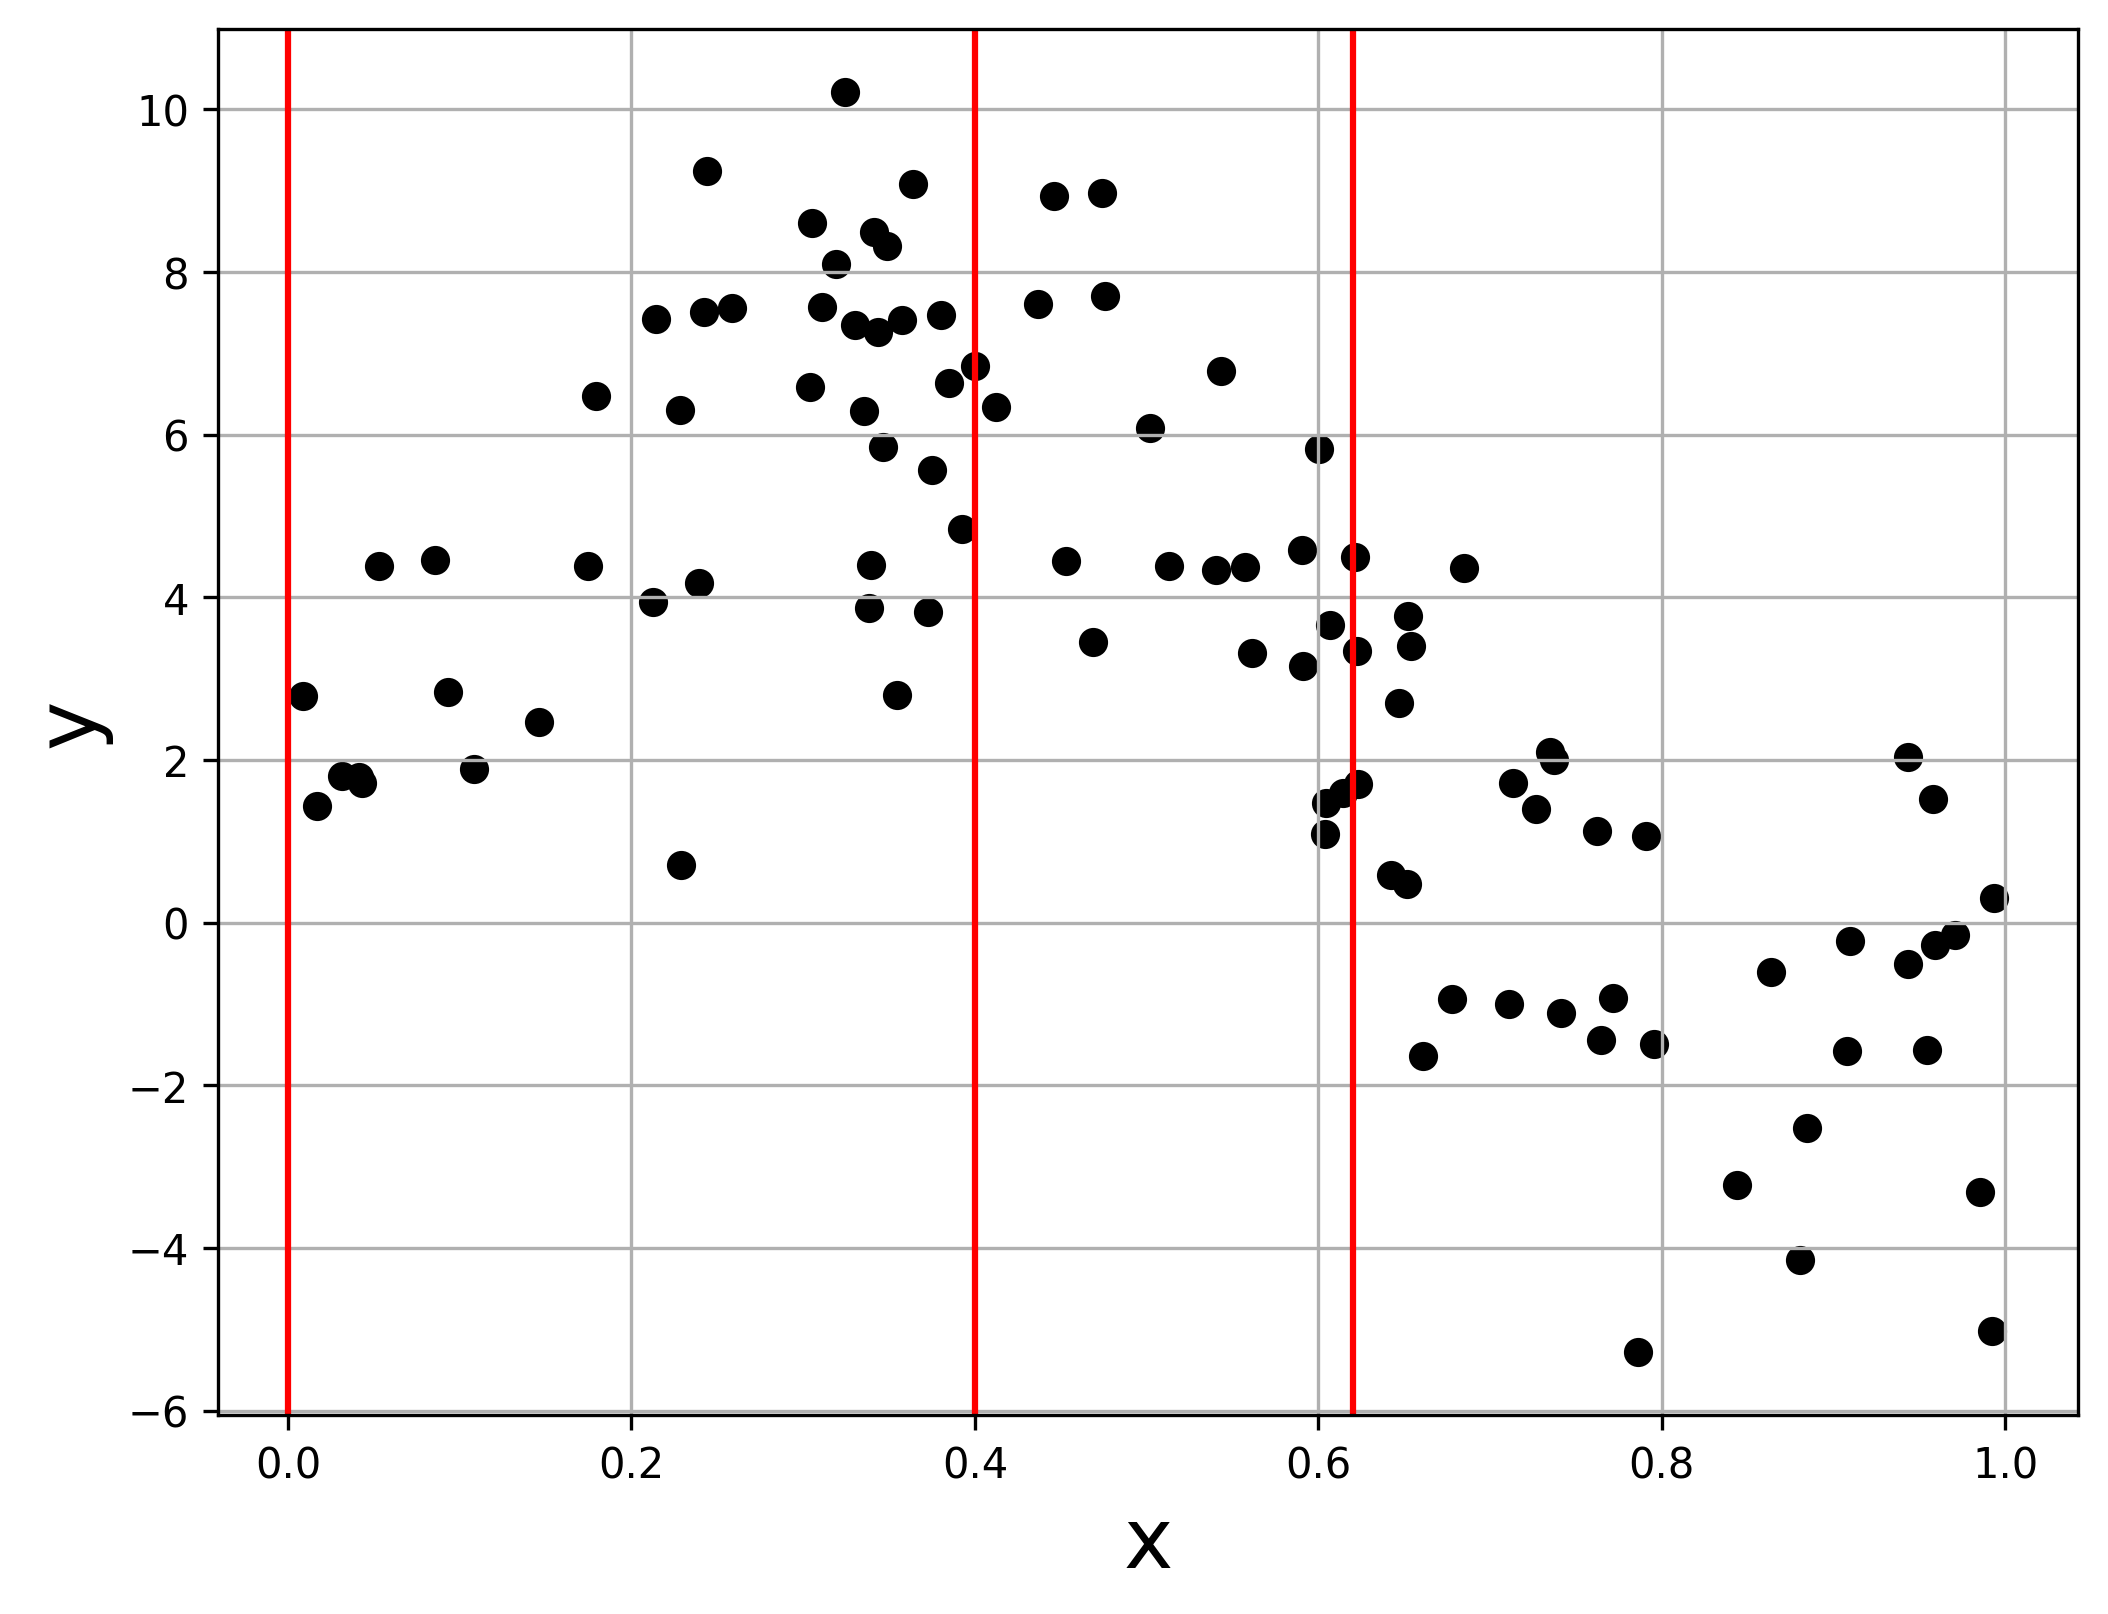

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

#-- Plot the simulated x and y data
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = x.flatten()
y = y.flatten()

# Create a DataFrame
data_train = pd.DataFrame({'x': x, 'y': y})

# Fit the OLS model
model = smf.ols('y ~ x', data=data_train).fit()

# Print the summary
print(model.summary())

# Coefficients in DataFrame format
print(model.params)

# Other model properties
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)
print("Standard error:", model.mse_resid ** 0.5)
print("F-statistic:", model.fvalue)
print("p-value of F-statistic:", model.f_pvalue)
print("AIC:", model.aic)
print("BIC:", model.bic)
print("Degrees of freedom of residuals:", model.df_resid)
print("Number of observations:", model.nobs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.99e-12
Time:                        14:05:18   Log-Likelihood:                -243.76
No. Observations:                 100   AIC:                             491.5
Df Residuals:                      98   BIC:                             496.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4863      0.604     12.393      0.0

In [ ]:
import numpy as np
import pandas as pd

# Add a constant term (for intercept) to x data
X = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Create a prediction dataset
xseq = np.linspace(0, 1, 200)  # sequence of 200 equally spaced values between 0 and 1
xeval = sm.add_constant(xseq)

# Predict using the fitted model
yhat1 = result.predict(xeval)

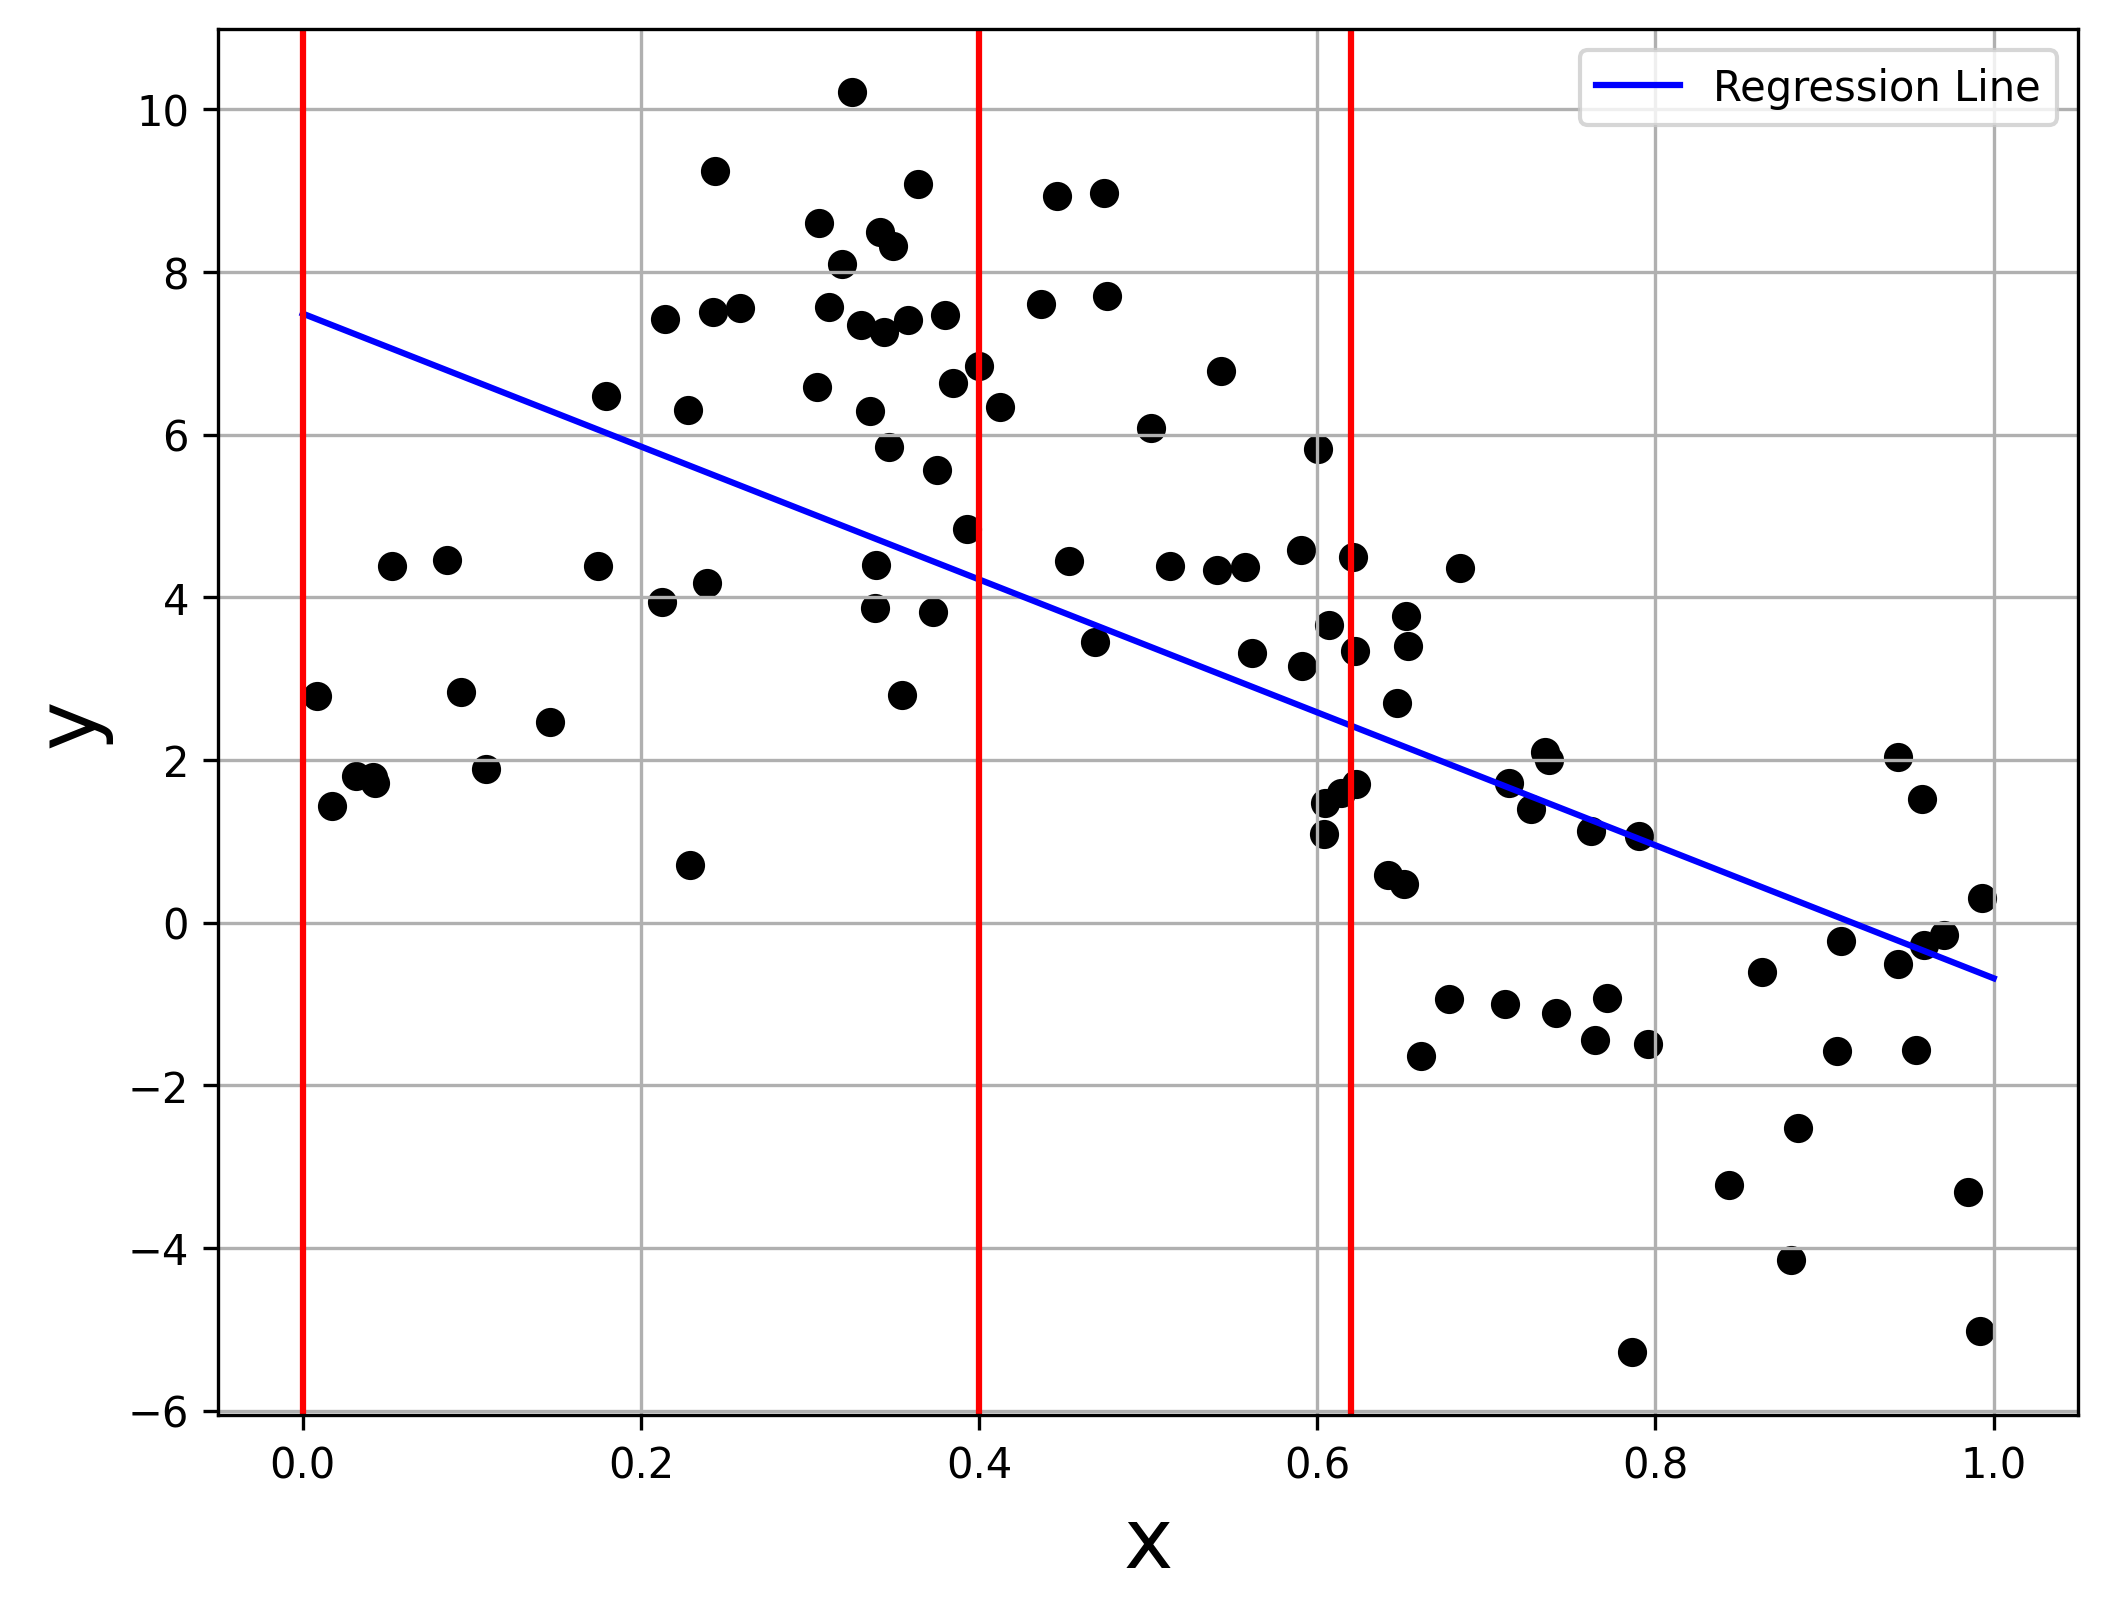

In [ ]:
# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# plot the regression line with predictions
plt.plot(xseq, yhat1, color='blue', label='Regression Line')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.legend()  # add a legend to the plot
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming sim_x and sim_y are already defined elsewhere, and you've already set up data_train as before

#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

data_train = pd.DataFrame({'x': x, 'y': y})

# Create the polynomial features for the model
data_train['x2'] = data_train['x']**2
X = sm.add_constant(data_train[['x', 'x2']])

# Fit the quadratic regression model
model2 = sm.OLS(data_train['y'], X)
result2 = model2.fit()

# Create a prediction dataset
xseq = np.linspace(0, 1, 200)  # sequence of 200 equally spaced values between 0 and 1
xeval2 = pd.DataFrame({'x': xseq, 'x2': xseq**2})
xeval2 = sm.add_constant(xeval2)
yhat2 = result2.predict(xeval2)

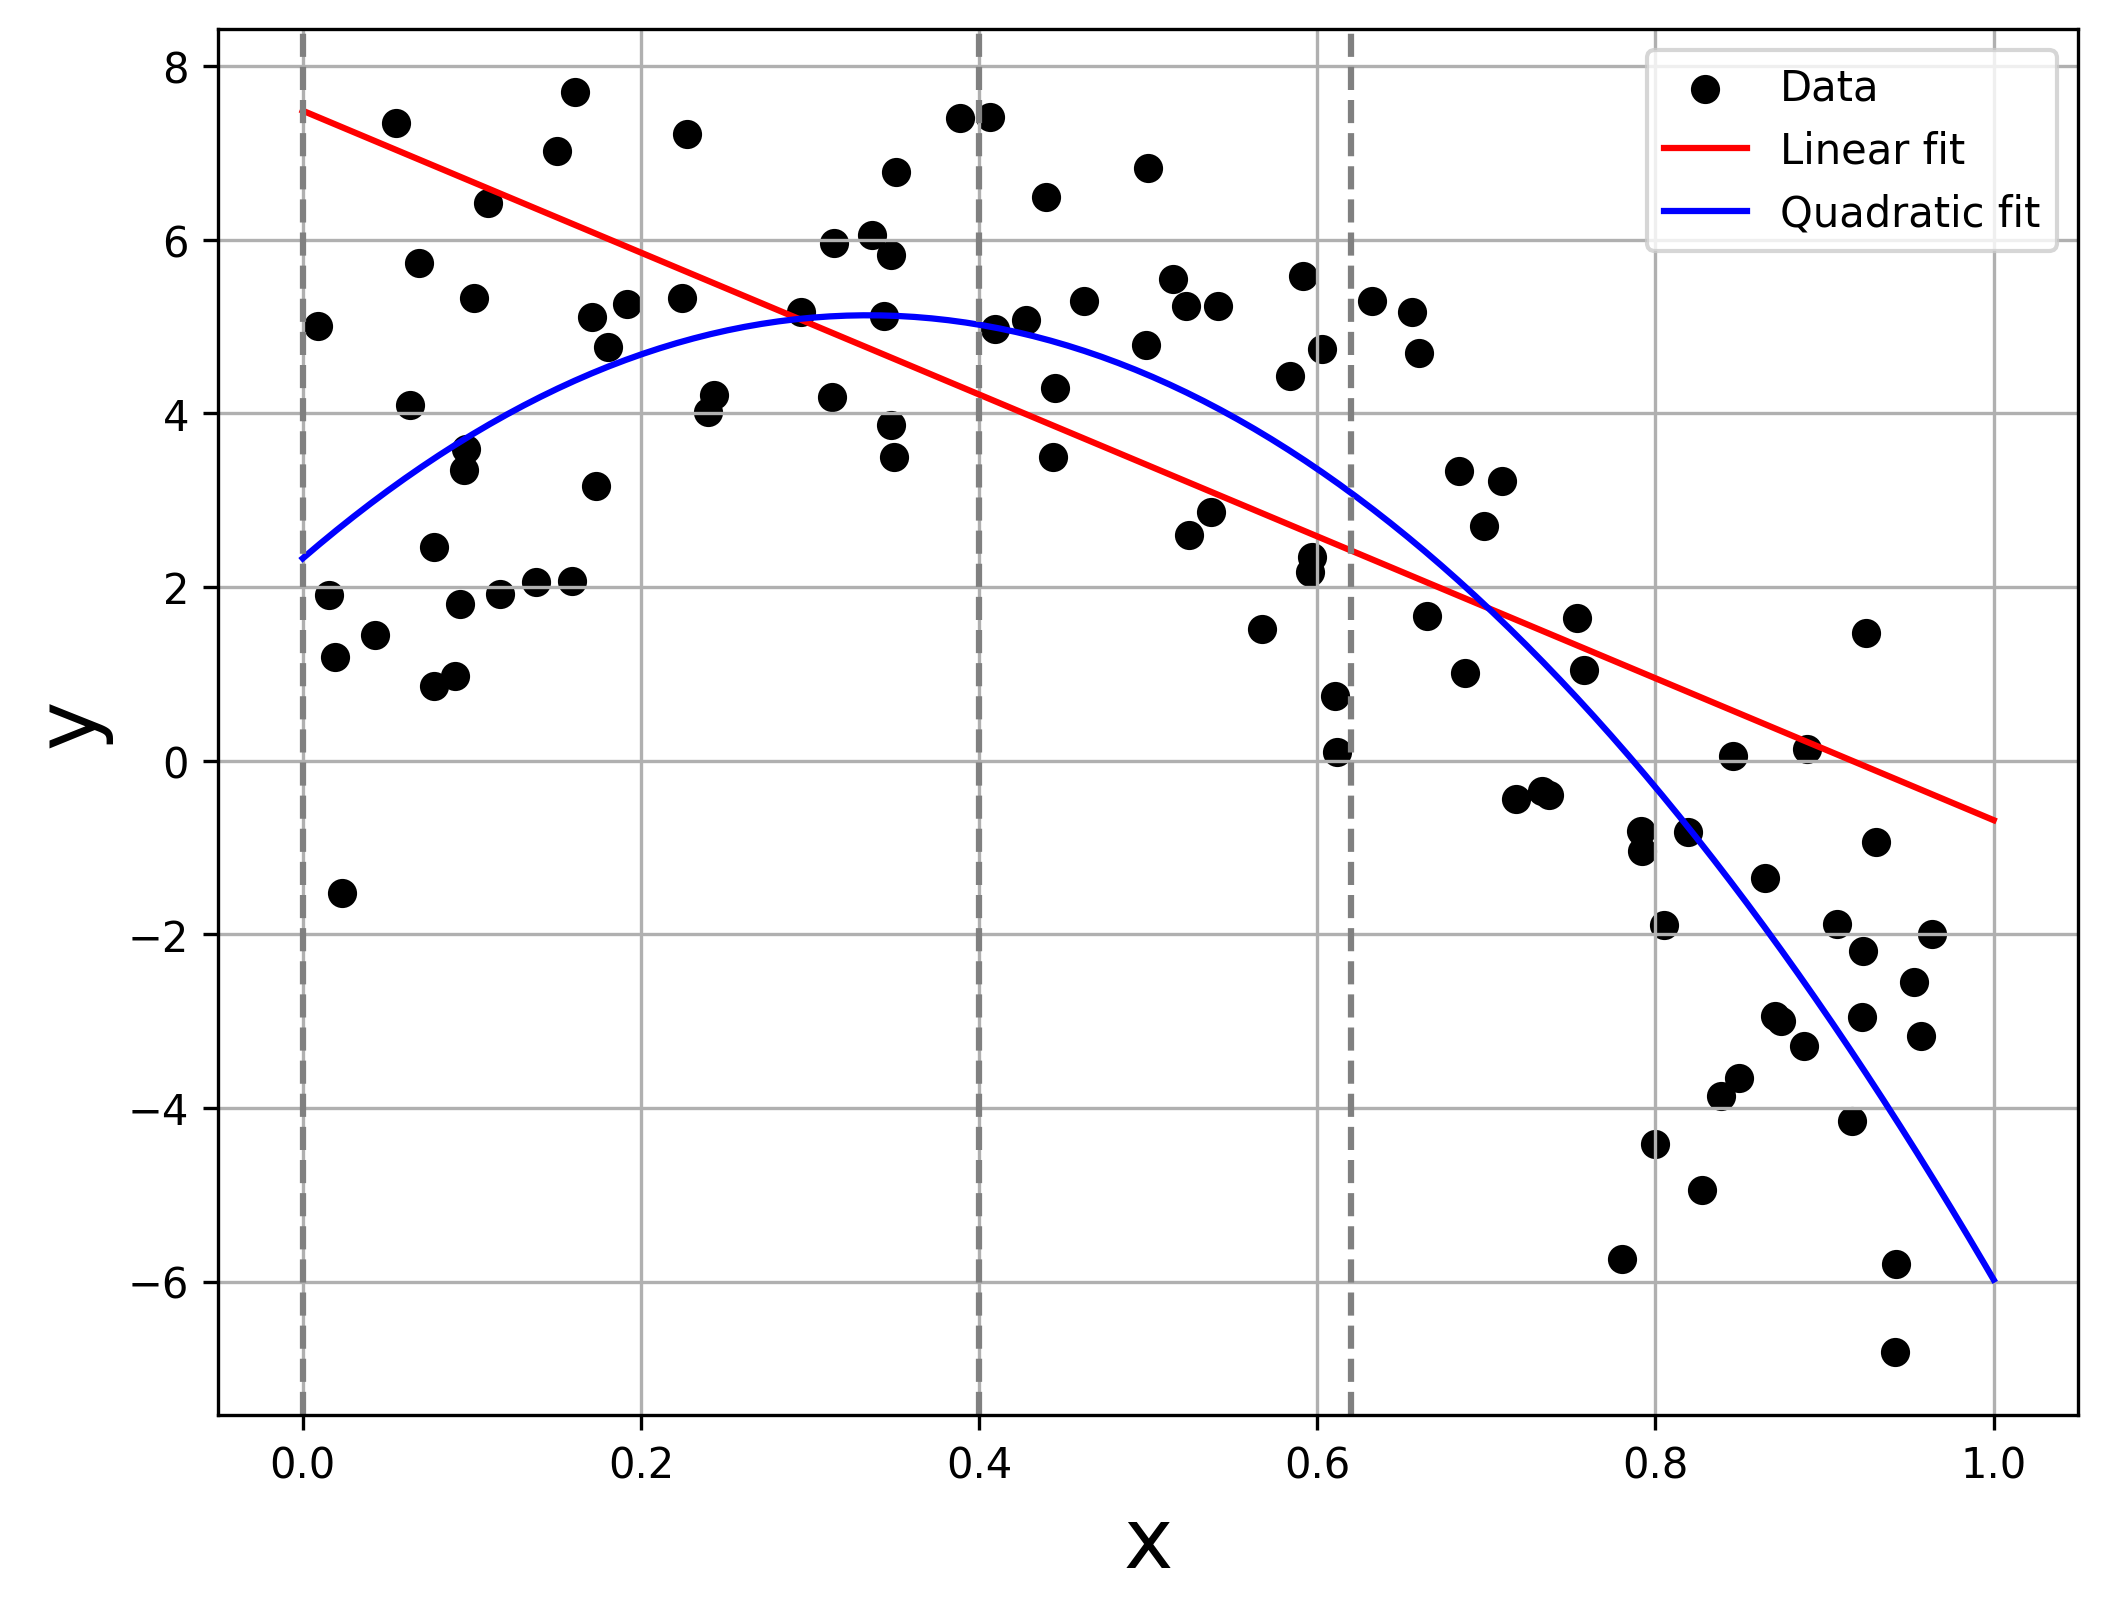

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

mpl.rcParams['figure.dpi'] = 300

# Assuming x, y, xseq, yhat1, and yhat2 have already been defined and computed

#-- Plot the simulated x and y data
fig = plt.gcf()  # fig is the figure's unique handle
fig.set_size_inches(8, 6)  # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black', label='Data')

# Plot the linear regression predictions
plt.plot(xseq, yhat1, color='red', label='Linear fit')

# Plot the quadratic regression predictions
plt.plot(xseq, yhat2, color='blue', label='Quadratic fit')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='grey', linestyle='--')

plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


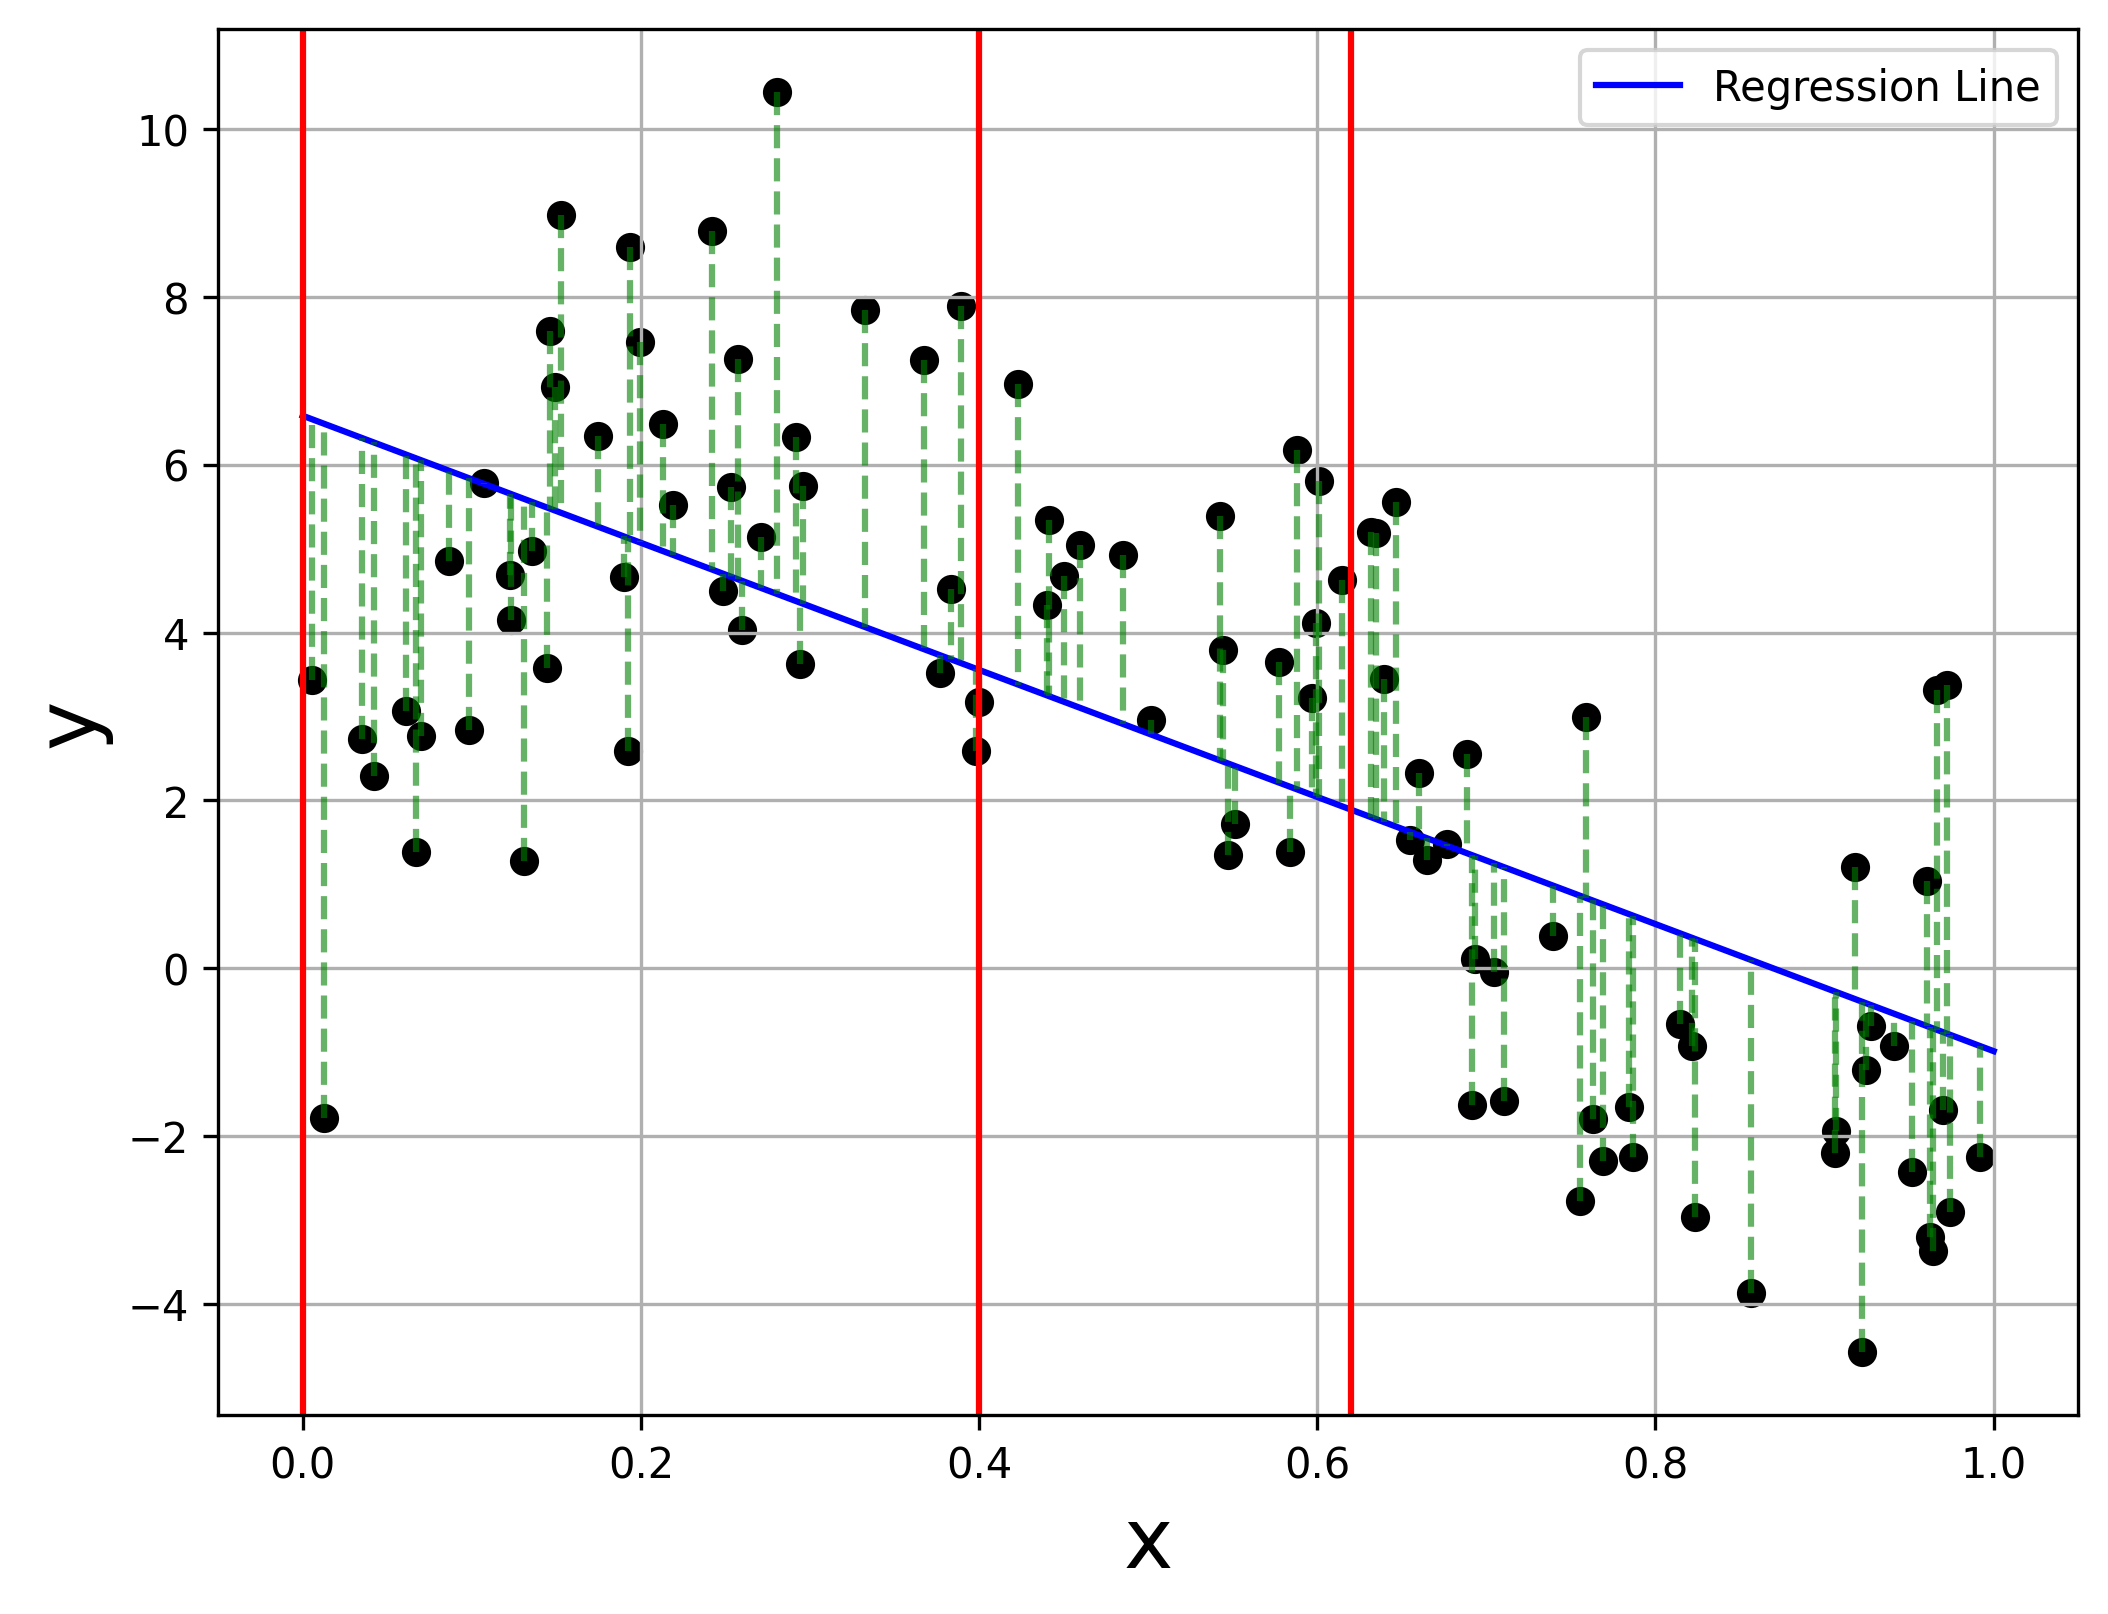

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming sim_x and sim_y are already defined elsewhere

#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

# Fit the OLS model
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()

# Predicted values for the original x data
y_pred = result.predict(X)

# Create a prediction dataset for the smooth line
xseq = np.linspace(0, 1, 200)  # sequence of 200 equally spaced values between 0 and 1
xeval = sm.add_constant(xseq)
yhat1 = result.predict(xeval)

# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# plot the regression line with predictions
plt.plot(xseq, yhat1, color='blue', label='Regression Line')

# Drawing lines from each point to the regression line
for xi, yi, yp in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, yp], color='green', linestyle='--', alpha=0.6)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.legend()  # add a legend to the plot
plt.grid()
plt.show()


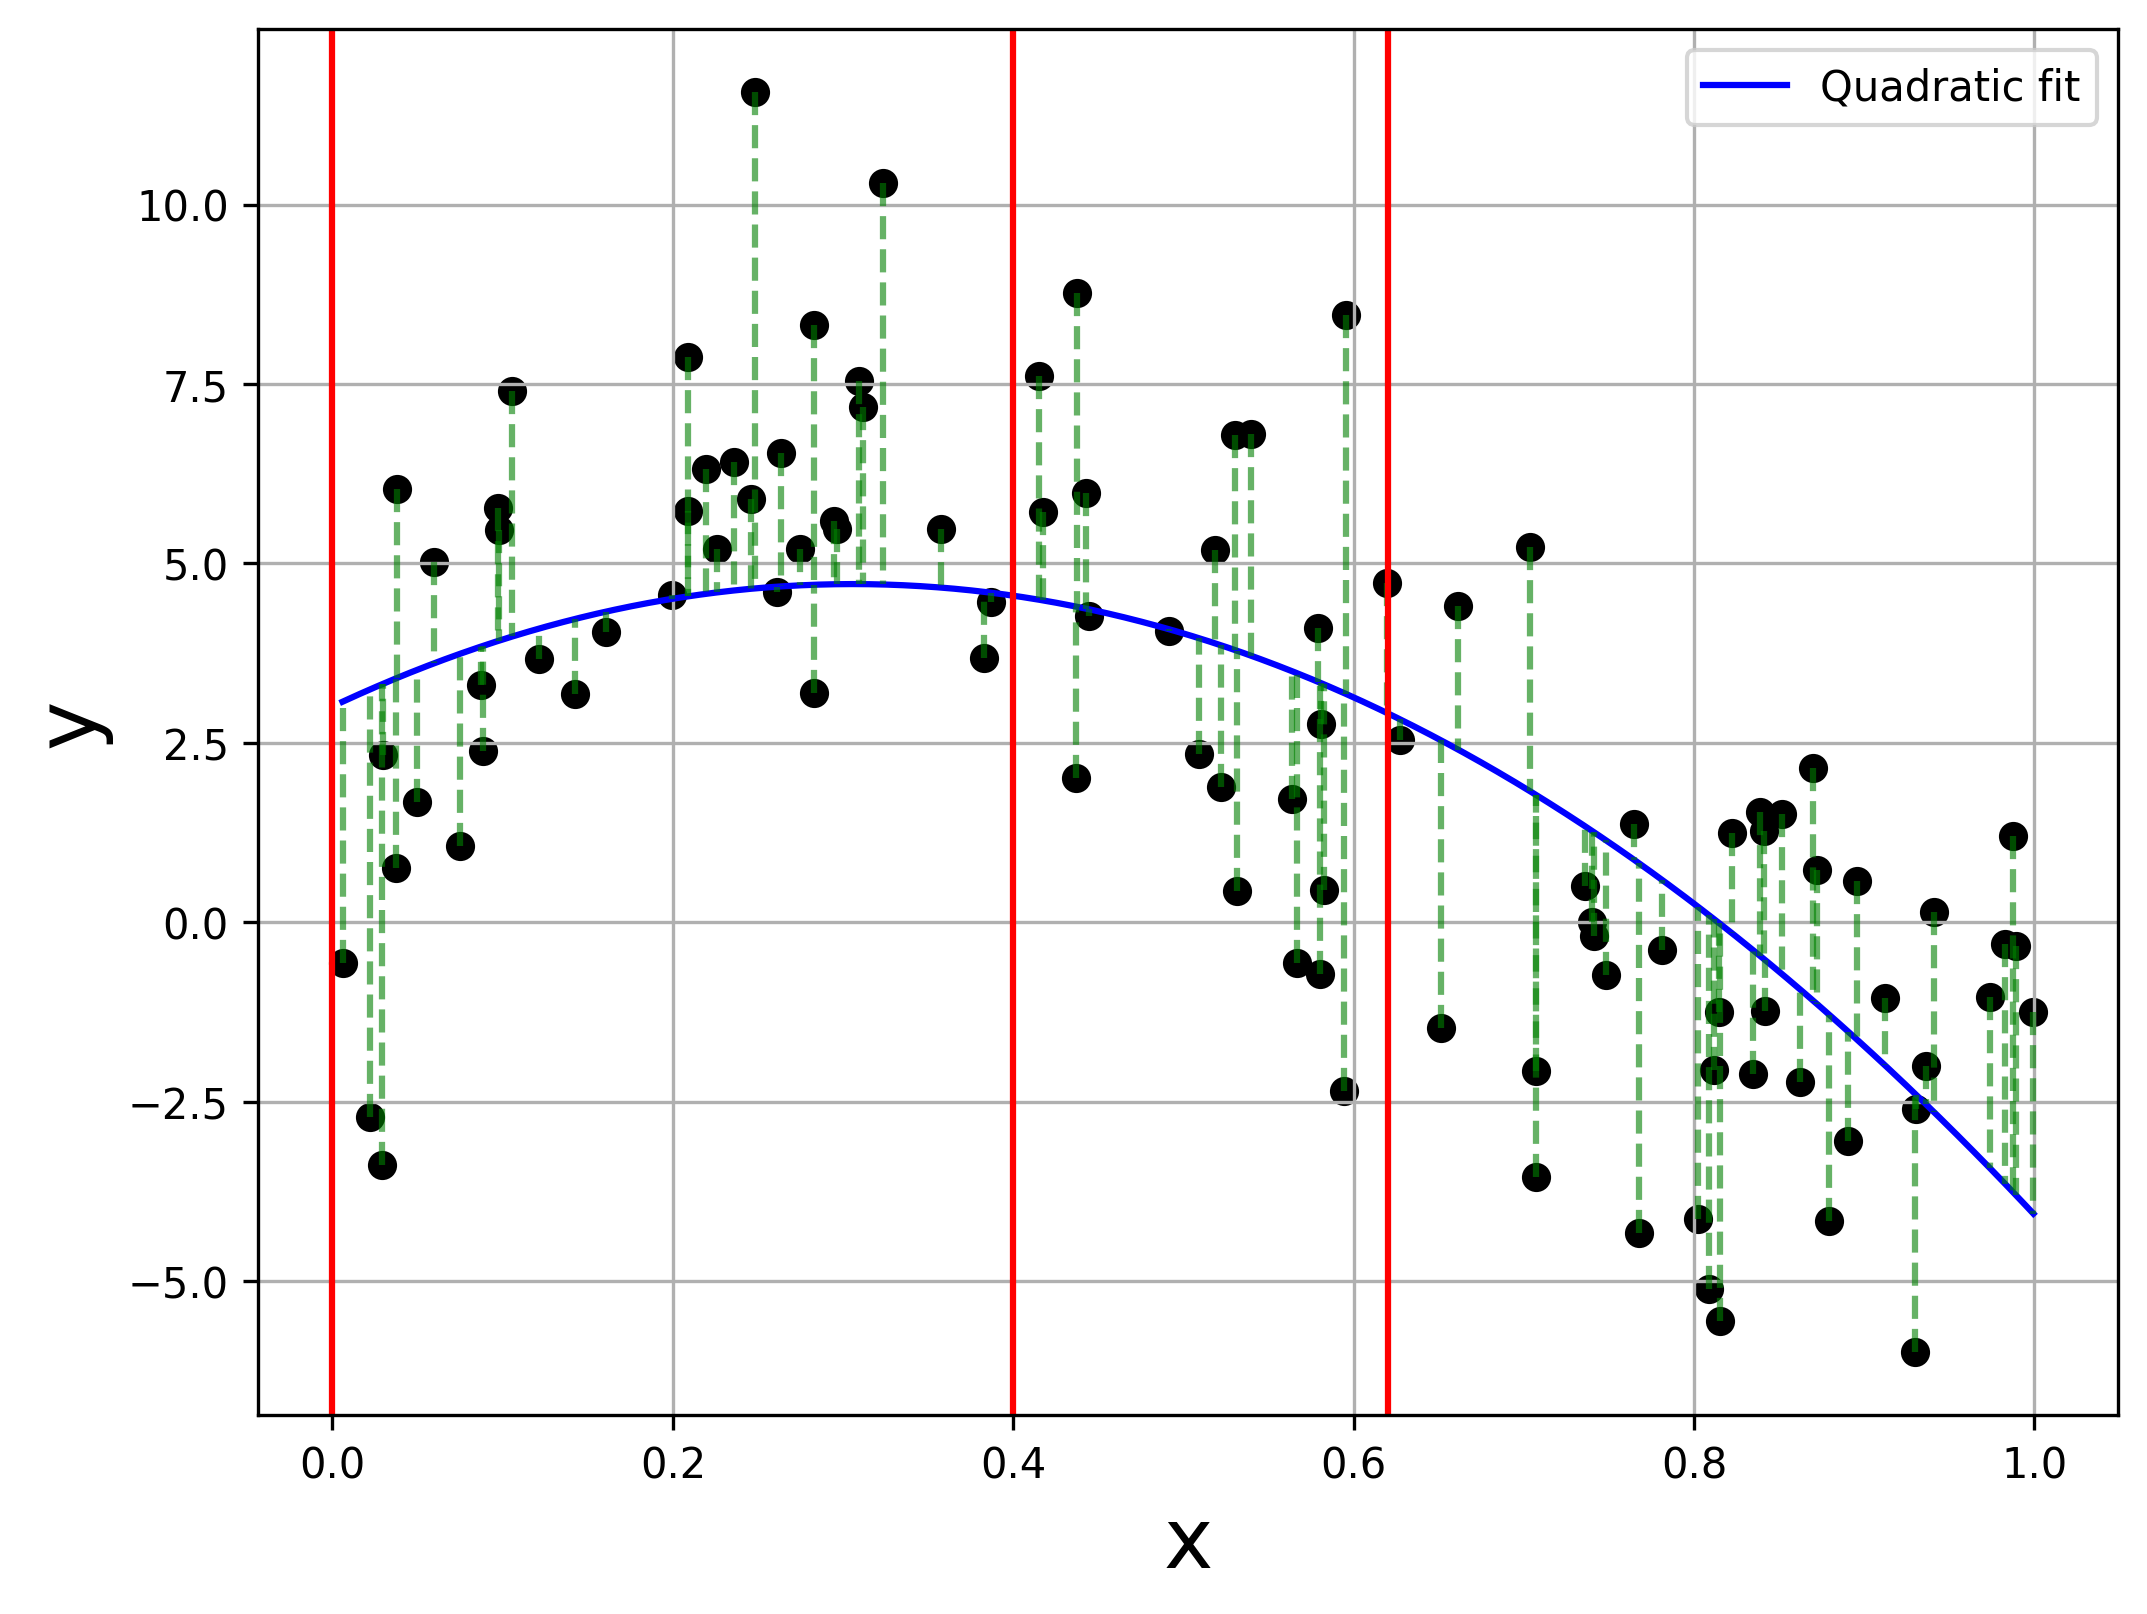

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your previously defined x and y
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

# Quadratic regression
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
yhat2 = p(x)

# Fine-grained xseq for plotting the smooth curve
xseq = np.linspace(min(x), max(x), 200)
y_quad_smooth = p(xseq)

# Setup for high-resolution plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Scatter plot
plt.scatter(x, y, color='black')

# Quadratic curve
plt.plot(xseq, y_quad_smooth, color='blue', label='Quadratic fit')

# Lines from original points to the regression curve
for xi, yi, y2i in zip(x, y, yhat2):
    plt.plot([xi, xi], [yi, y2i], color='green', linestyle='--', alpha=0.6)

# Labels and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


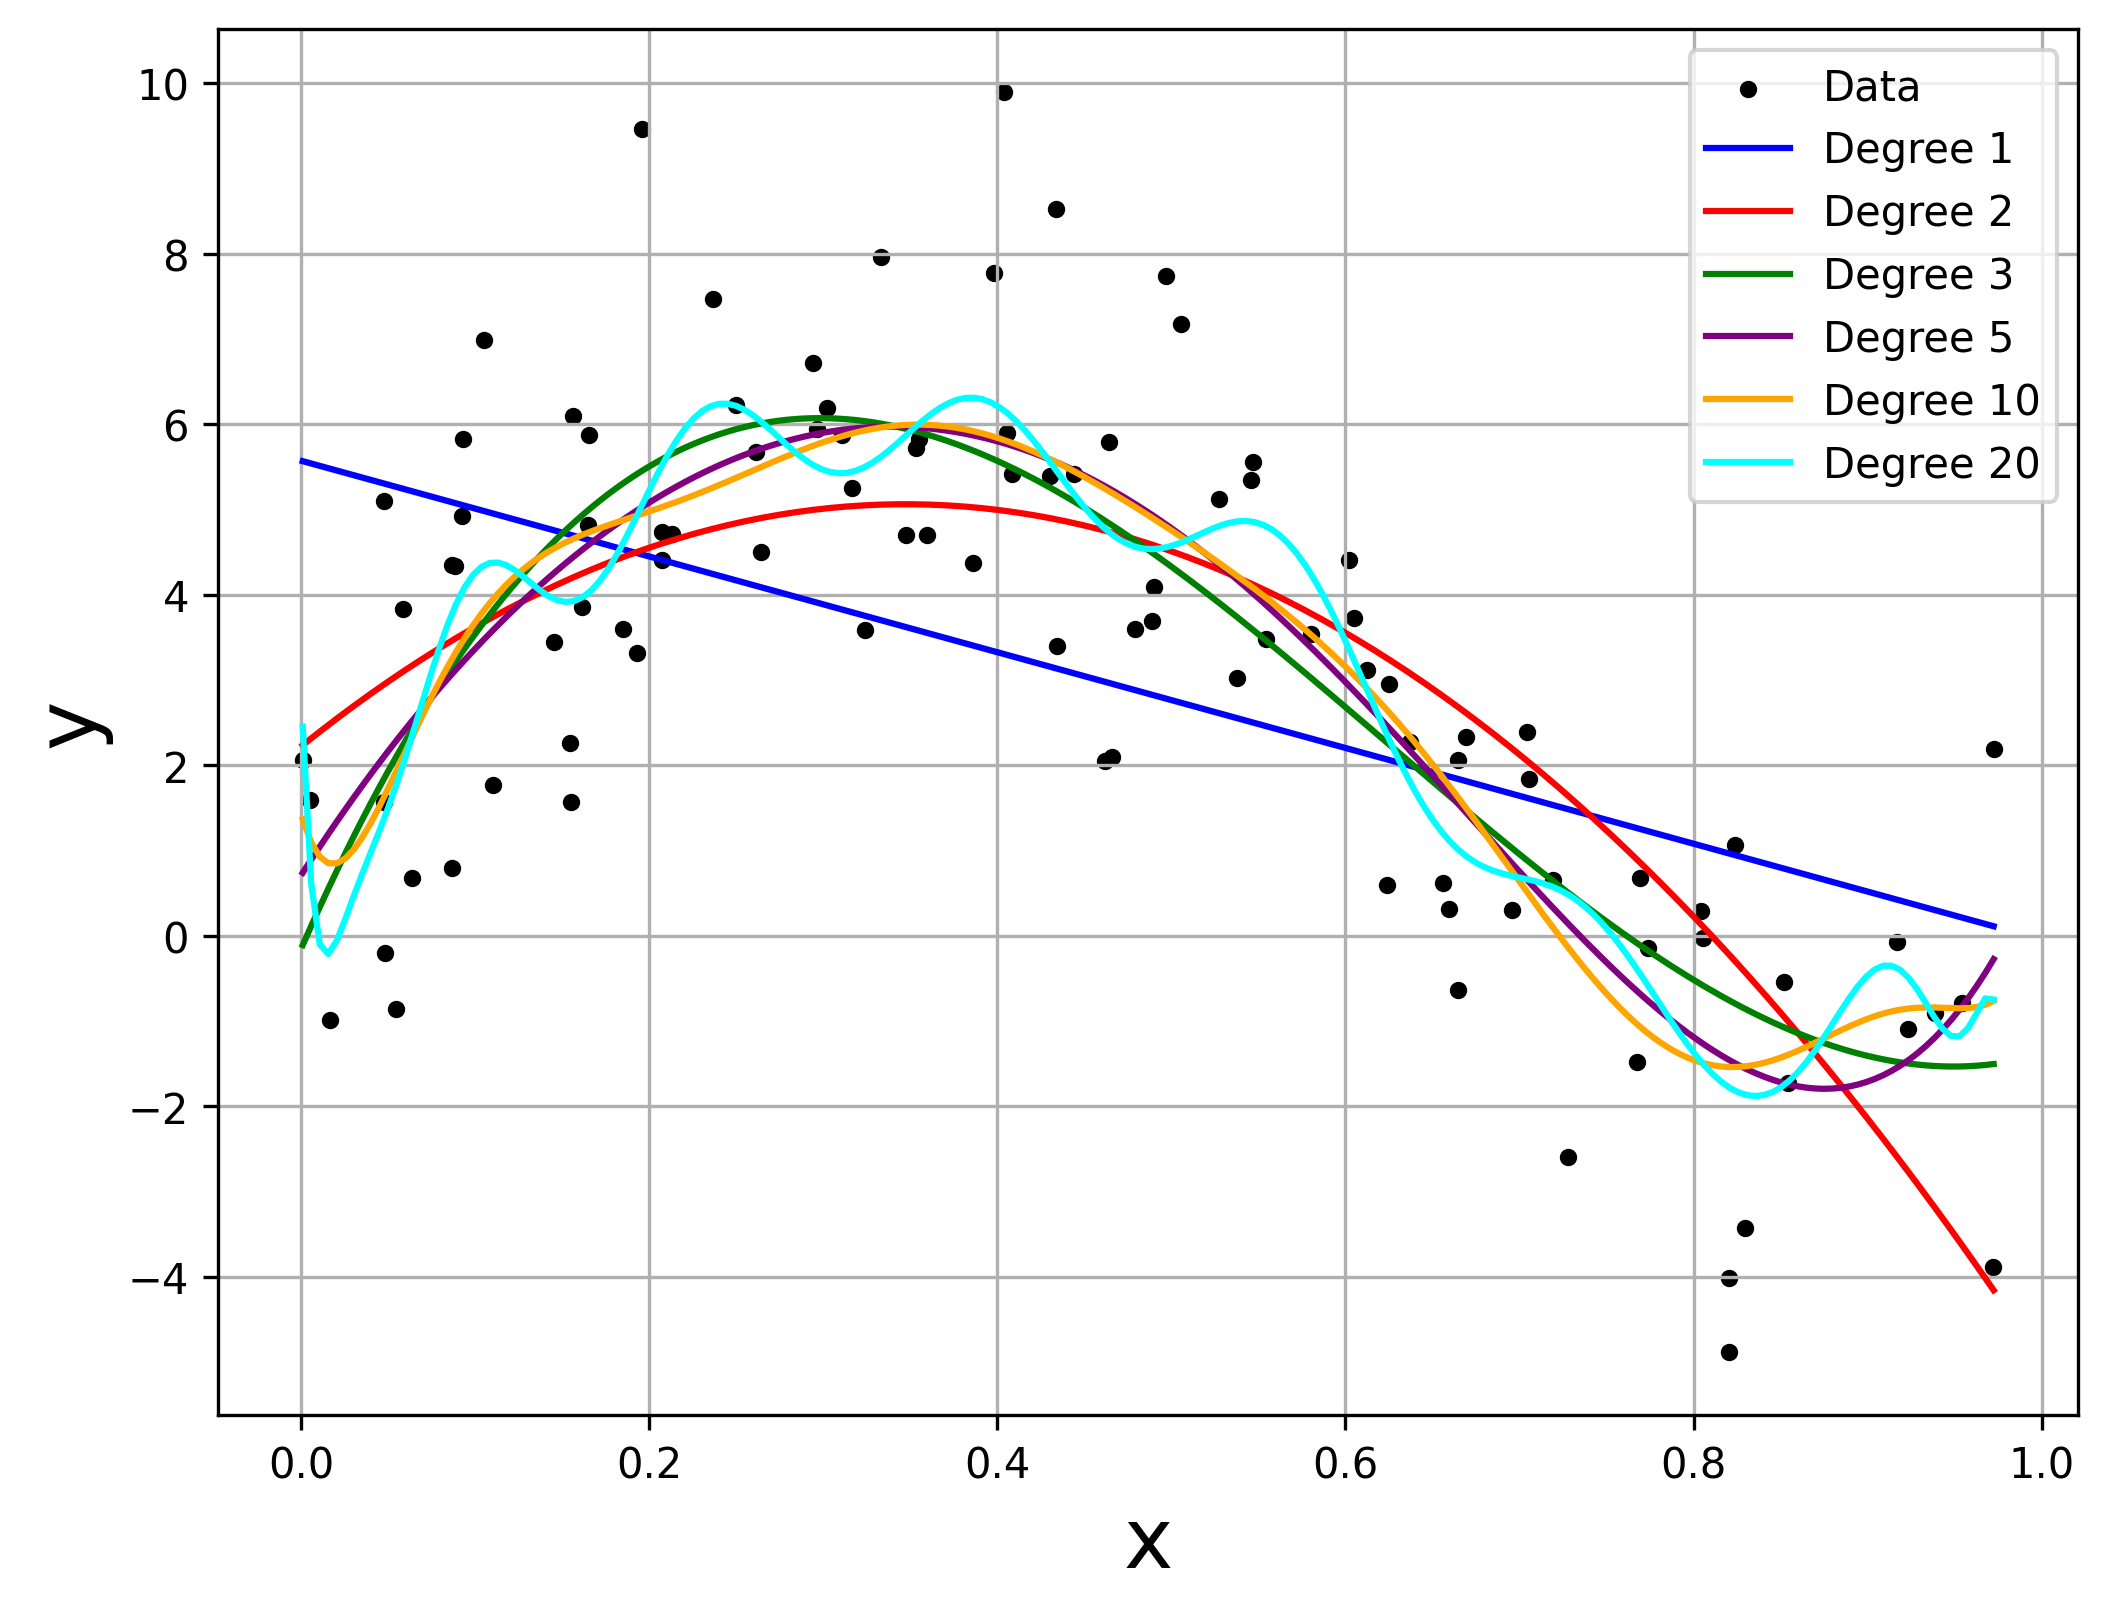

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

# Define the xseq for plotting smooth curves
xseq = np.linspace(min(x), max(x), 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Scatter plot of the original data
plt.scatter(x, y, color='black', s=10, label='Data')

# Polynomial fits and plotting for various degrees
degrees = [1, 2, 3, 5, 10, 20]
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']

for deg, color in zip(degrees, colors):
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    plt.plot(xseq, p(xseq), color=color, label=f'Degree {deg}')

# Labels, legend, and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.grid()
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Assuming `data_train` is a pandas DataFrame and `xeval` is already defined
n = 100
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()
data_train = pd.DataFrame({'x': x, 'y': y})
xeval = pd.DataFrame({'x': np.linspace(min(x), max(x), 200)})

# Separate features and target variable from the training data
X_train = data_train[['x']].values
y_train = data_train['y'].values

# Create the knn regression model with k = 20 neighbors
knn_20 = KNeighborsRegressor(n_neighbors=20)

# Fit the model
knn_20.fit(X_train, y_train)

# Make predictions on the xeval dataset
yhat_knn_20 = knn_20.predict(xeval)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


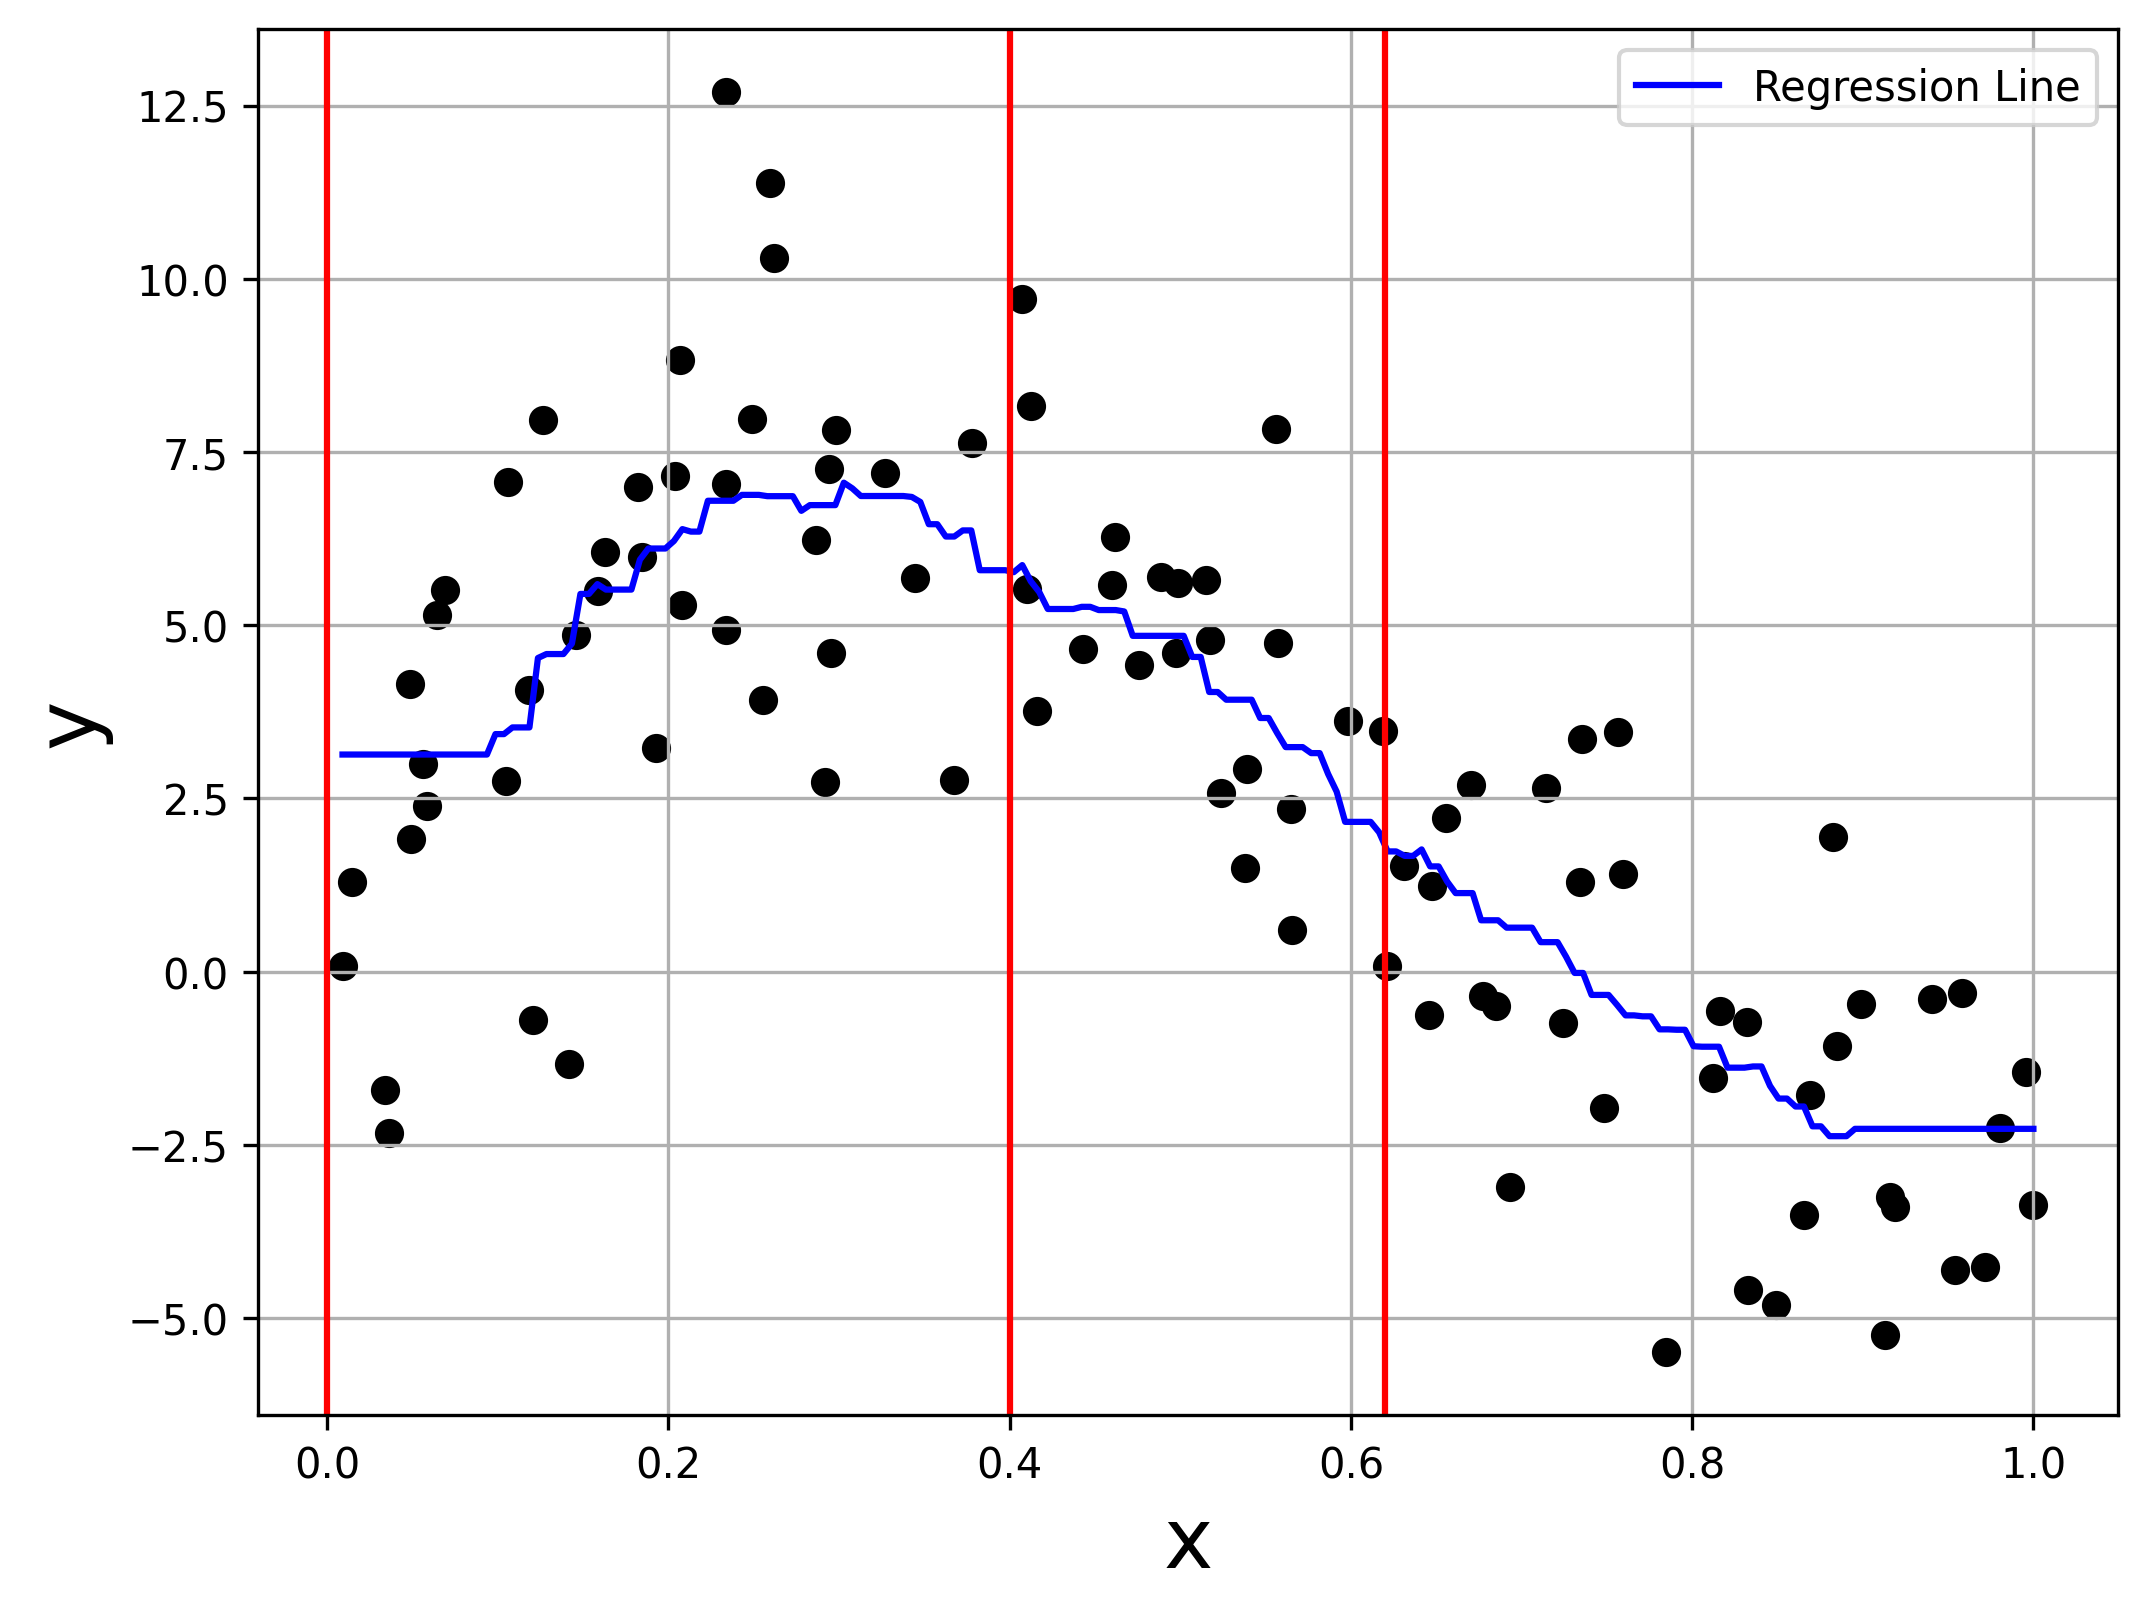

In [ ]:
# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# plot the regression line with predictions
plt.plot(xeval, yhat_knn_20, color='blue', label='Regression Line')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.legend()  # add a legend to the plot
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  w

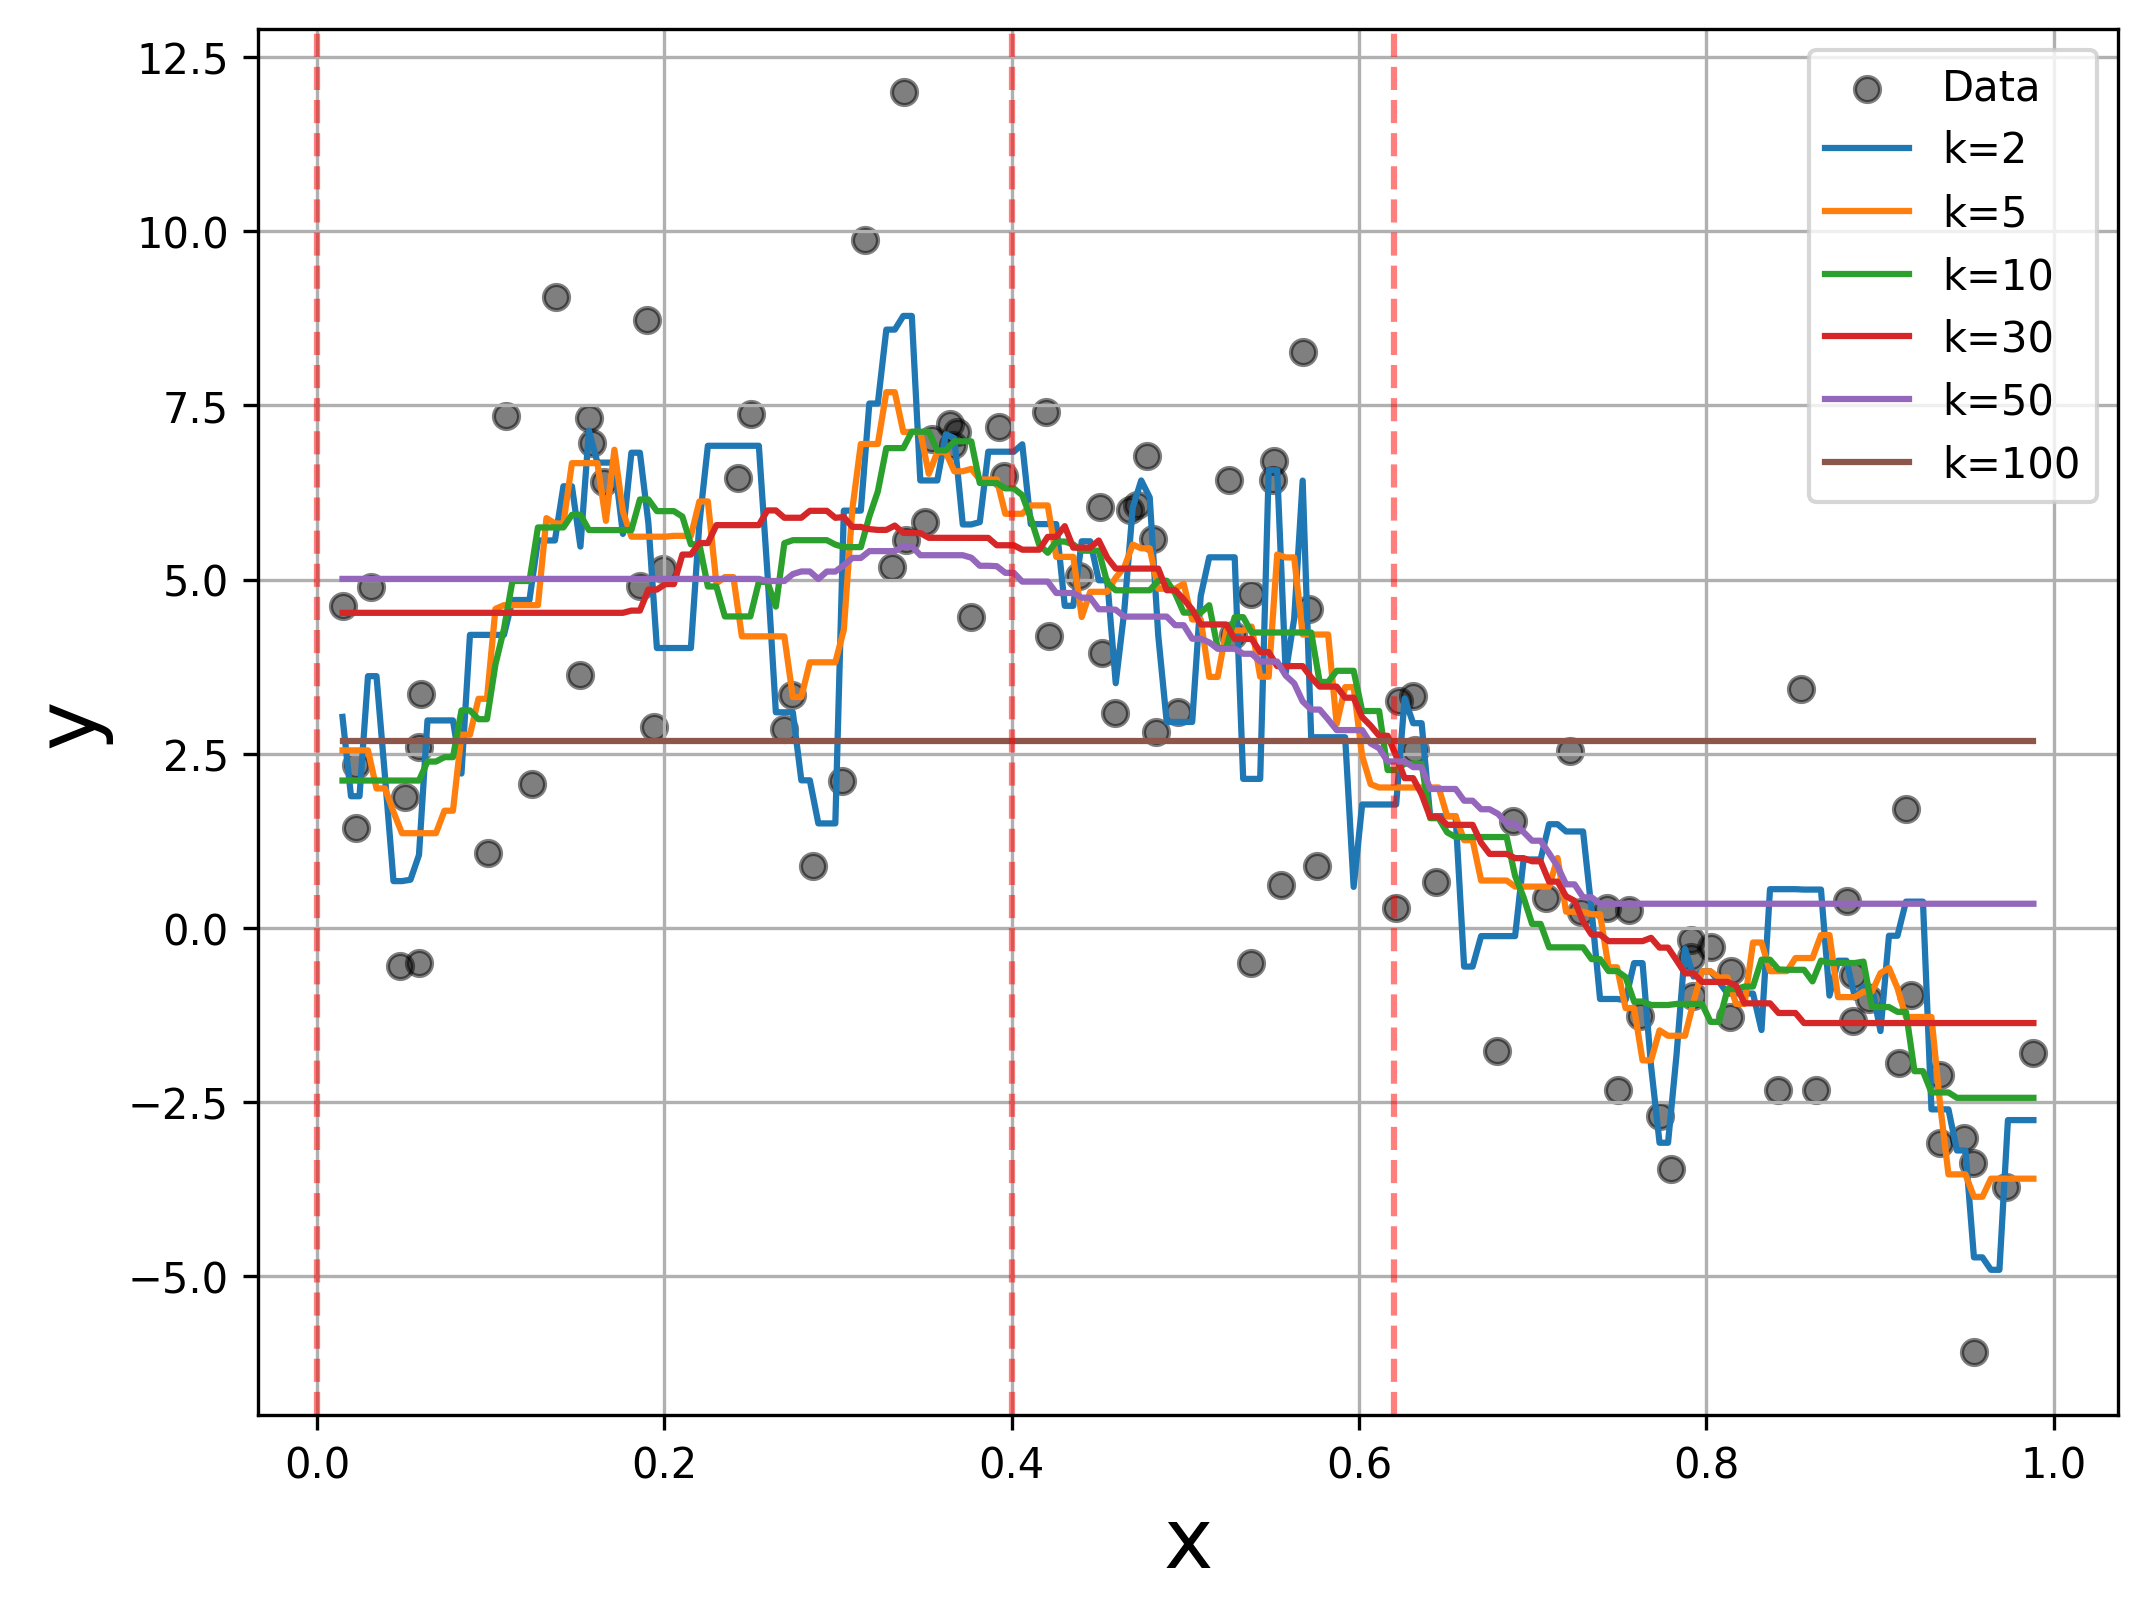

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Assuming sim_x and sim_y are defined elsewhere
n = 100
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()
data_train = pd.DataFrame({'x': x, 'y': y})
xeval = pd.DataFrame({'x': np.linspace(min(x), max(x), 200)})

# Separate features and target variable from the training data
X_train = data_train[['x']].values
y_train = data_train['y'].values

# List of k values
k_values = [2, 5, 10, 30, 50, 100]

# Plot settings
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
fig = plt.gcf()
fig.set_size_inches(8,6)

# plot the data with black color
plt.scatter(x, y, color='black', alpha=0.5, label='Data')

# For each k, fit the k-NN regression and plot the predicted values
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    yhat_knn = knn_model.predict(xeval)
    plt.plot(xeval, yhat_knn, label=f'k={k}')

# Set the labels, legend, and grid
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r', linestyle='--', alpha=0.5)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming sim_x and sim_y are defined elsewhere
n = 100
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()
data_train = pd.DataFrame({'x': x, 'y': y})
xeval = pd.DataFrame({'x': np.linspace(min(x), max(x), 100)})

# Separate features and target variable from the training data
X_train = data_train[['x']].values
y_train = data_train['y'].values

# List of k values
k_values = [2, 5, 10, 30, 50, 100]

# Create empty lists to store results
k_list = []
mse_list = []
third_col_list = []

# For each k, fit the k-NN regression, predict and compute MSE
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    yhat_knn = knn_model.predict(xeval)

    mse = mean_squared_error(y_train, knn_model.predict(X_train))

    k_list.append(k)
    mse_list.append(mse)
    third_col_list.append(len(xeval) / k)

# Organize results in a DataFrame
results_df = pd.DataFrame({
    'k': k_list,
    'MSE': mse_list,
    'xeval/k': third_col_list
})

print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  w

     k        MSE    xeval/k
0    2   2.207814  50.000000
1    5   3.743340  20.000000
2   10   3.938078  10.000000
3   30   4.637970   3.333333
4   50   6.654665   2.000000
5  100  12.677735   1.000000


In [ ]:
#-- slide 20 (knn)
n = 100
x = sim_x(n)
y = sim_y(x, sd)
xseq = np.arange(0,1,1/n).reshape(n,1)

k_list = [2,5,10,50,100]

Y_pred_knn = np.zeros((len(x),len(k_list)))
Y_pred_MSE_knn = np.zeros((len(k_list),2))

for i, k in enumerate(k_list): # google "enumerate"
    model_knn = KNeighborsRegressor(n_neighbors=k) # fit k for 2, 5, 10, 50, and 100
    model_knn.fit(x,y)
    tpred = model_knn.predict(sorted(x))

    Y_pred_knn[:,i:i+1] = tpred
    Y_pred_MSE_knn[i,0] = k
    Y_pred_MSE_knn[i,1] = mean_squared_error(tpred, y)

[[ 1.          5.04343534]
 [ 2.          2.26690445]
 [ 3.          0.98572029]
 [ 5.          0.81140263]
 [10.          0.77591303]
 [20.          0.66054882]]


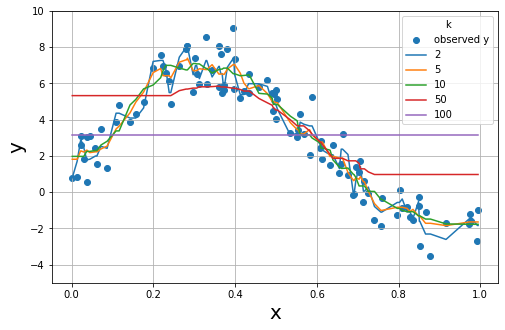

In [ ]:
#-- sldie 20 (knn; continued)
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(sorted(x),Y_pred_knn,label=k_list)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, title='k')
plt.ylim([-5,10])


print(Y_pred_MSE)

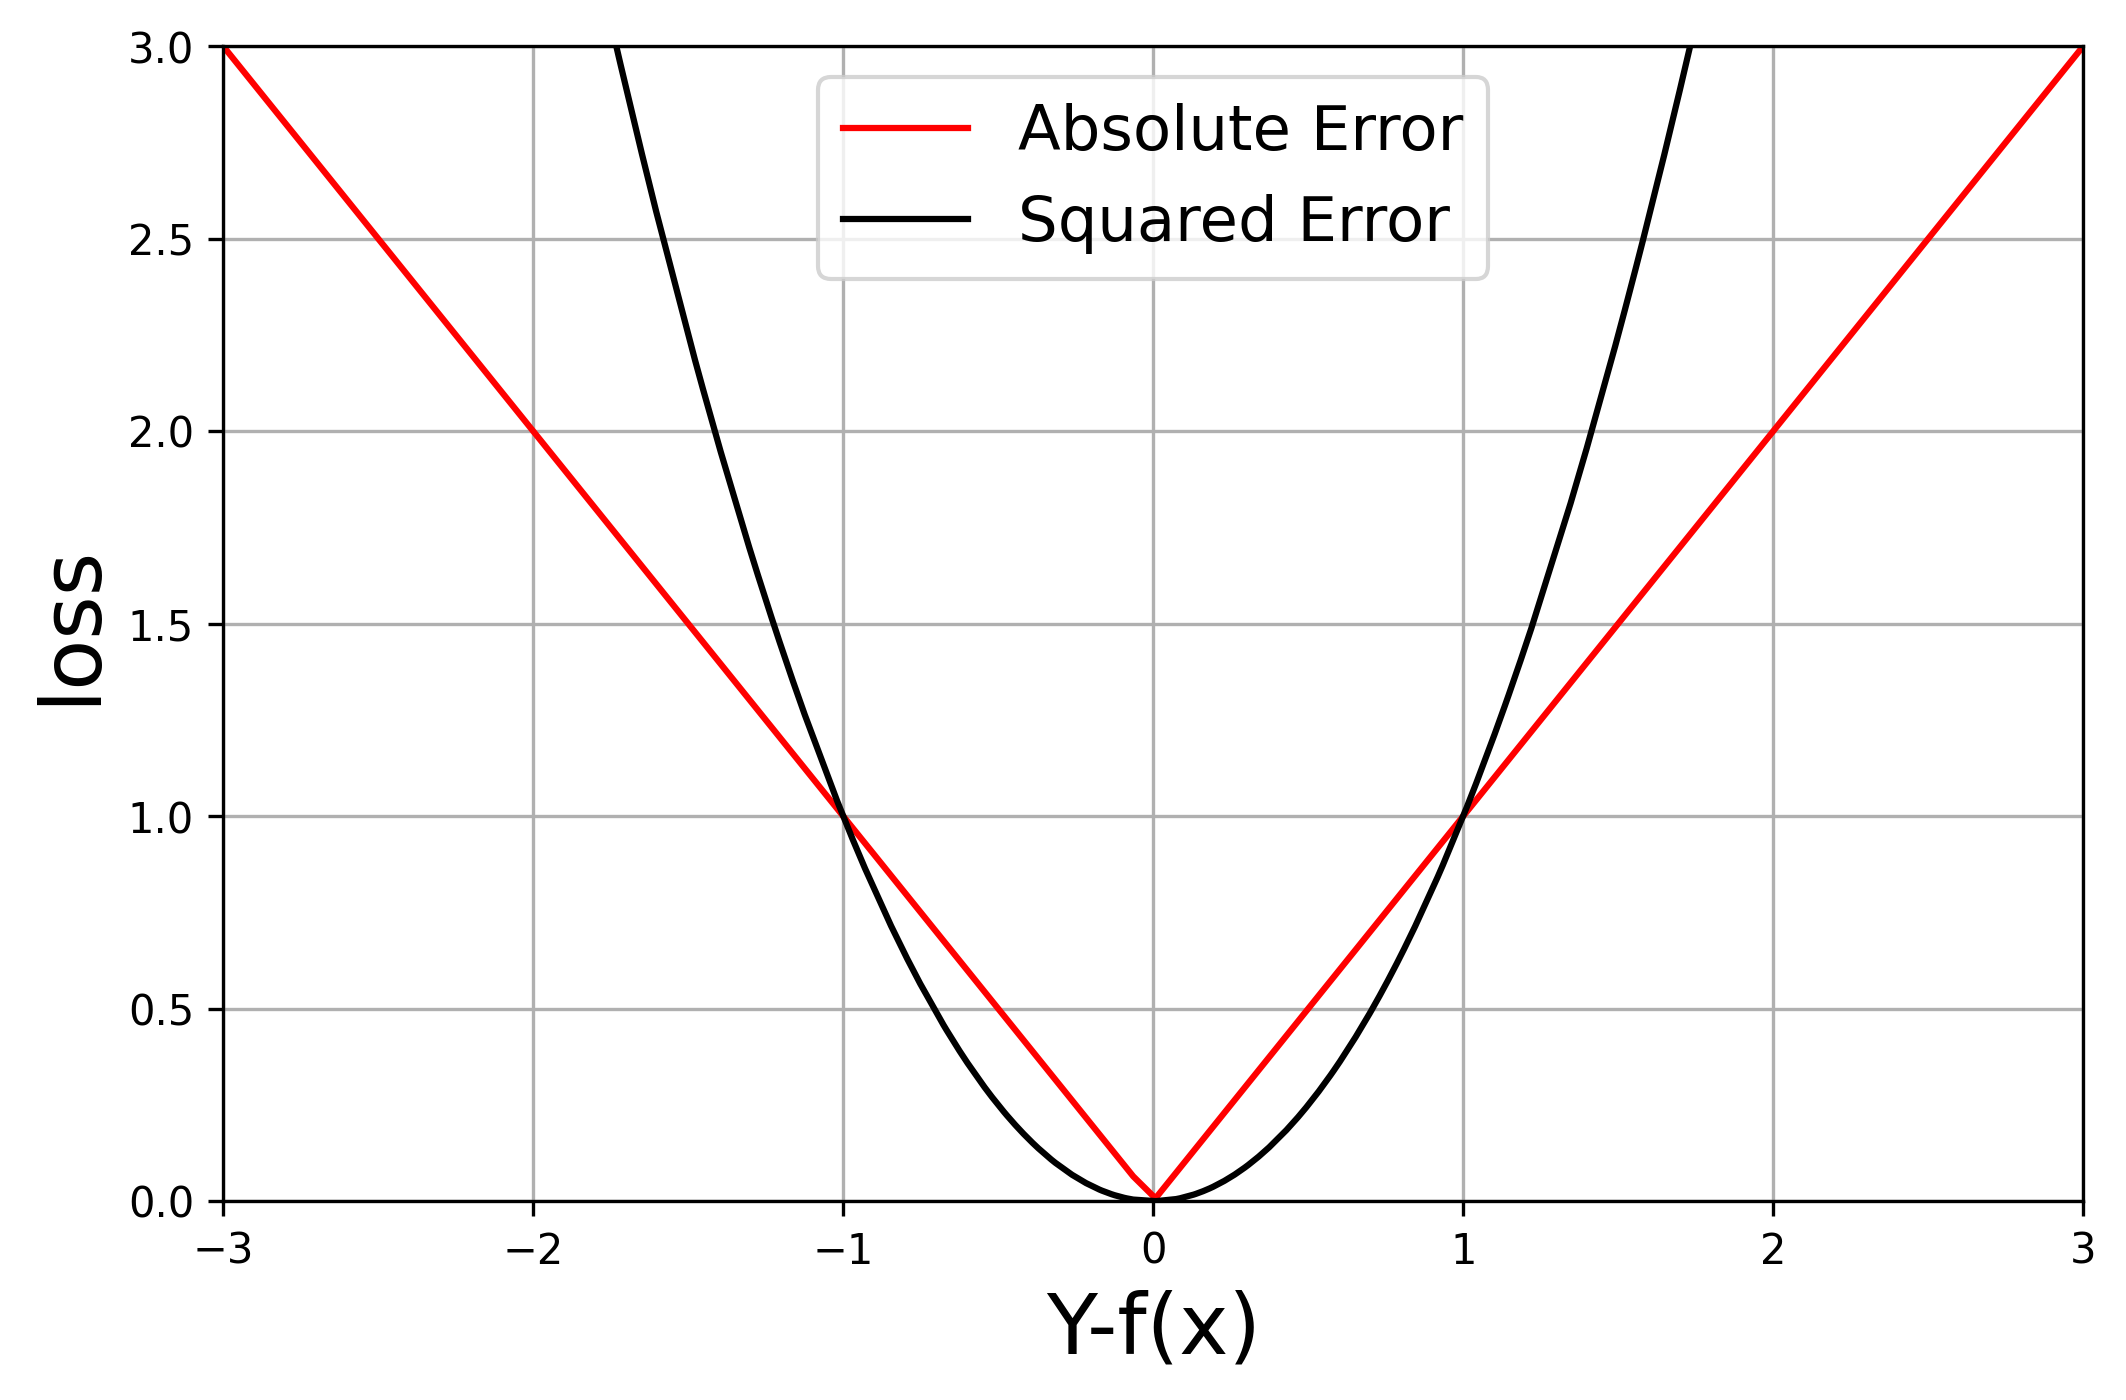

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

n = 1000
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

# cross-validation-related code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=321)

# simple linear regression model
SLR_model = LinearRegression()
SLR_model.fit(x_train, y_train)

y_hat = SLR_model.predict(x_test) # y_hat from our model, f(x)

y_y_hat = (y_test - y_hat).flatten()  # Flatten the array
sorted_indices = np.argsort(y_y_hat)
sorted_y_y_hat = y_y_hat[sorted_indices]
sorted_absolute_error = abs(sorted_y_y_hat)
sorted_square_error = sorted_y_y_hat**2

# plot
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# Plot lines instead of scatter points
plt.plot(sorted_y_y_hat, sorted_absolute_error, label='Absolute Error', color='red')  # red line for absolute error
plt.plot(sorted_y_y_hat, sorted_square_error, label='Squared Error', color='black')    # black line for squared error

plt.xlabel('Y-f(x)', size=20)
plt.ylabel('loss', size=20)

plt.grid()
plt.xlim([-3, 3])
plt.ylim([0,3])
plt.legend(loc=0, fontsize=15)
plt.show()